In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/creditcard.csv'
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

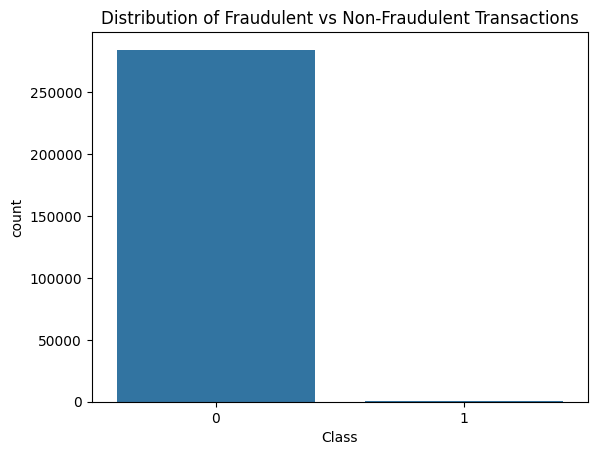

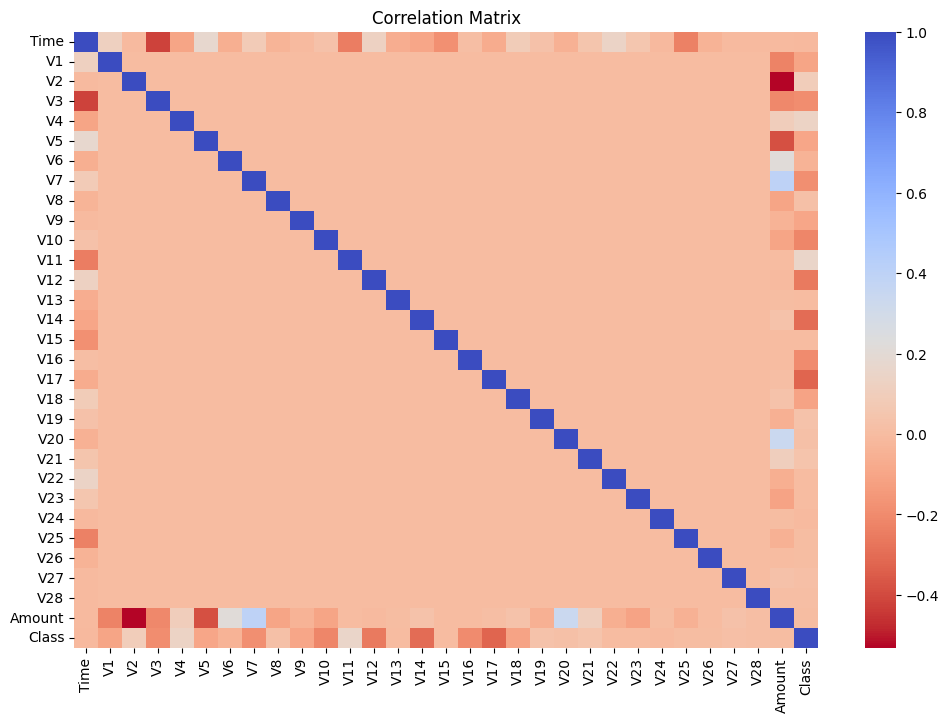

In [7]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [8]:
df['V1_V2'] = df['V1'] * df['V2']

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 31)
(56962, 31)
(227845,)
(56962,)


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [17]:
smote

SMOTE(random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc

model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.94      0.11       101

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUPRC: 0.5005852151708928


In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='average_precision')
print(f'Cross-Validation AUPRC Scores: {cv_scores}')
print(f'Mean AUPRC: {cv_scores.mean()}')

Cross-Validation AUPRC Scores: [0.9904957  0.99026035 0.99012389 0.9904274  0.99059705]
Mean AUPRC: 0.9903808794983412
